Implementation of Transformer Model on AUD-USD(D) prediction of the close price 1 day ahead based on data of previous 10 hours

## 1. Data Preparation

### 1.1 Read in data file

In [1]:
import talib as ta

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import keras

In [2]:
data = pd.read_csv('AUD_USD_M15_TA_71.csv')
data.set_index('datetime', inplace=True)
data



,open,high,low,close,upperband,middleband,lowerband,dema,ema,ht,...,trix,ultosc,willr,atr,natr,trange,avgprice,medprice,typprice,wclprice
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02,0.78230,0.78230,0.78230,0.78230,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.782300,0.782300,0.782300,0.782300
2005-01-02,0.78200,0.78280,0.78180,0.78230,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00100,0.782225,0.782300,0.782300,0.782300
2005-01-02,0.78180,0.78180,0.78180,0.78180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00050,0.781800,0.781800,0.781800,0.781800
2005-01-02,0.78140,0.78160,0.78060,0.78060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00120,0.781050,0.781100,0.780933,0.780850
2005-01-02,0.78080,0.78130,0.78080,0.78090,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00070,0.780950,0.781050,0.781000,0.780975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,0.77134,0.77135,0.77082,0.77134,0.773069,0.771351,0.769633,0.769878,0.771787,0.771285,...,-0.026900,45.174271,-51.048951,0.001270,0.164593,0.00053,0.771212,0.771085,0.771170,0.771212
2021-02-28,0.77129,0.77232,0.77125,0.77203,0.773103,0.771368,0.769632,0.770068,0.771806,0.771270,...,-0.026312,46.603642,-34.965035,0.001261,0.163369,0.00107,0.771723,0.771785,0.771867,0.771907
2021-02-28,0.77210,0.77337,0.77140,0.77294,0.773146,0.771378,0.769609,0.770382,0.771897,0.771295,...,-0.025572,46.941583,-13.752914,0.001291,0.166997,0.00197,0.772452,0.772385,0.772570,0.772663


In [3]:
data.shape

(407400, 71)

In [4]:
# close(t)
# wclprice(t)
# typprice(t)
# avgprice(t)
# high(t)
# medprice(t)
# low(t)
# dx(t)
# trange(t-1)
# trange(t)
# trange(t-2)
# trange(t-3)
# bop(t-3)
# bop(t-2)
# dx(t-2)
# bop(t-1)
# bop(t)
# fastdrsi(t-3)
# macdhistext(t-3)

In [5]:
## xgboost
# wclprice(t)
# close(t)
# typprice(t)
# wclprice(t-1)
# avgprice(t)
# high(t)
# close(t-3)
# typprice(t-2)
# low(t)
# sma10(t)
# upperband(t)
# midprice(t-3)
# upperband(t-3)
# low(t-1)
# medprice(t)
# open(t-3)
# macdsignalfix(t)
# dema(t-3)
# roc(t-3)
# dema(t-2)

In [6]:
vital = ['wclprice', 'close', 'typprice', 'avgprice', 'high', 
         'low', 'sma10', 'upperband', 'midprice', 'medprice', 
         'open', 'macdsignalfix', 'dema', 'roc']


In [7]:
data_back = data
data = data[vital]
data.shape


(407400, 14)

In [8]:
data = data[-100000:]


## 2. Data Processing

In [9]:
## drop rows with NANs
data.dropna(axis=0, inplace=True)
data = data.reset_index(drop=True)
print('shape of data: ', data.shape)
data

shape of data:  (100000, 14)


,wclprice,close,typprice,avgprice,high,low,sma10,upperband,midprice,medprice,open,macdsignalfix,dema,roc
0,0.770723,0.77074,0.770717,0.770713,0.77076,0.77065,0.769702,0.771009,0.769660,0.770705,0.77070,0.000174,0.770340,0.187183
1,0.770877,0.77092,0.770863,0.770825,0.77096,0.77071,0.769736,0.771119,0.769700,0.770835,0.77071,0.000193,0.770450,0.200161
2,0.771020,0.77096,0.771040,0.771018,0.77128,0.77088,0.769766,0.771228,0.769860,0.771080,0.77095,0.000213,0.770552,0.176715
3,0.771125,0.77120,0.771100,0.771075,0.77126,0.77084,0.769809,0.771365,0.769860,0.771050,0.77100,0.000235,0.770678,0.213109
4,0.771005,0.77096,0.771020,0.771075,0.77124,0.77086,0.769831,0.771441,0.769860,0.771050,0.77124,0.000254,0.770752,0.197546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.771212,0.77134,0.771170,0.771212,0.77135,0.77082,0.773618,0.773069,0.771385,0.771085,0.77134,-0.001182,0.769878,-0.106196
99996,0.771907,0.77203,0.771867,0.771723,0.77232,0.77125,0.773521,0.773103,0.771385,0.771785,0.77129,-0.001098,0.770068,0.050542
99997,0.772663,0.77294,0.772570,0.772452,0.77337,0.77140,0.773435,0.773146,0.771385,0.772385,0.77210,-0.000992,0.770382,0.031060
99998,0.774198,0.77469,0.774033,0.773750,0.77483,0.77258,0.773406,0.773693,0.772035,0.773705,0.77290,-0.000850,0.770932,0.353645


### 2.1 Train - validation - test split

In [10]:
train_split_frac = 0.8
val_split_frac = 0.9

train_split = int(train_split_frac * int(data.shape[0]))  ## end of train index (exclusive)
val_split = int(val_split_frac * int(data.shape[0]))      ## end of val index (exclusive)

In [11]:
training_data = data[: train_split]
validation_data = data[train_split: val_split]
test_data = data[val_split:]

In [12]:
print('Shape of training_data:   ', training_data.shape)
print('Shape of validation_data: ', validation_data.shape)
print('Shape of test_data:       ', test_data.shape)

Shape of training_data:    (80000, 14)
Shape of validation_data:  (10000, 14)
Shape of test_data:        (10000, 14)


### 2.2 Standardisation


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
training_data = scaler.fit_transform(training_data)
validation_data = scaler.transform(validation_data)
test_data = scaler.transform(test_data)

### 2.3 Create dataset

In [15]:
step = 1
past = 24  #previous 6 hours
future = 1
learning_rate = 0.00001
batch_size = 256
epochs = 10000

y = data[['close']]

#### 2.3.1 Training dataset

In [16]:
train_y_start = past + future
train_y_end = train_y_start + train_split
x_train = training_data
y_train = y.iloc[train_y_start: train_y_end].values
sequence_length = int(past / step)
import tensorflow as tf
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

#### 2.3.2 Validation dataset

In [17]:
val_y_start = train_y_end
val_y_end = train_y_start + val_split
x_val = validation_data
y_val = y.iloc[val_y_start: val_y_end].values
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

#### 2.3.3 Testing dataset

In [18]:
x_end = len(test_data) - past - future
test_y_start = val_y_end
x_test = test_data[: x_end]
y_test = y.iloc[test_y_start: ].values
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=1,
)

In [19]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 24, 14)
Target shape: (256, 1)


In [20]:
len(y_test)

9975

## 3. Experiment: LSTM model

### 3.1 LSTM

In [21]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import keras

In [22]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(200)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 14)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               172000    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 172,201
Trainable params: 172,201
Non-trainable params: 0
_________________________________________________________________


### 3.1 Training

In [23]:
## call back
path_checkpoint_trans = "LSTM_200_xgb20.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=30)

modelckpt_callback_trans = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint_trans,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(dataset_train, 
                      epochs=10000, 
                      validation_data=dataset_val, 
                      callbacks=[es_callback, modelckpt_callback_trans],
                      verbose=2, 
                      shuffle=False)

Epoch 1/10000
313/313 - 29s - loss: 0.0972 - val_loss: 0.0104

Epoch 00001: val_loss improved from inf to 0.01042, saving model to LSTM_200_xgb20.h5
Epoch 2/10000
313/313 - 27s - loss: 0.0056 - val_loss: 0.0116

Epoch 00002: val_loss did not improve from 0.01042
Epoch 3/10000
313/313 - 27s - loss: 0.0042 - val_loss: 0.0108

Epoch 00003: val_loss did not improve from 0.01042
Epoch 4/10000
313/313 - 27s - loss: 0.0031 - val_loss: 0.0096

Epoch 00004: val_loss improved from 0.01042 to 0.00964, saving model to LSTM_200_xgb20.h5
Epoch 5/10000
313/313 - 27s - loss: 0.0024 - val_loss: 0.0084

Epoch 00005: val_loss improved from 0.00964 to 0.00838, saving model to LSTM_200_xgb20.h5
Epoch 6/10000
313/313 - 27s - loss: 0.0018 - val_loss: 0.0072

Epoch 00006: val_loss improved from 0.00838 to 0.00719, saving model to LSTM_200_xgb20.h5
Epoch 7/10000
313/313 - 27s - loss: 0.0014 - val_loss: 0.0061

Epoch 00007: val_loss improved from 0.00719 to 0.00612, saving model to LSTM_200_xgb20.h5
Epoch 8/100


Epoch 00055: val_loss improved from 0.00045 to 0.00042, saving model to LSTM_200_xgb20.h5
Epoch 56/10000
313/313 - 28s - loss: 9.0164e-05 - val_loss: 3.9576e-04

Epoch 00056: val_loss improved from 0.00042 to 0.00040, saving model to LSTM_200_xgb20.h5
Epoch 57/10000
313/313 - 29s - loss: 8.7499e-05 - val_loss: 3.7234e-04

Epoch 00057: val_loss improved from 0.00040 to 0.00037, saving model to LSTM_200_xgb20.h5
Epoch 58/10000
313/313 - 29s - loss: 8.4853e-05 - val_loss: 3.4972e-04

Epoch 00058: val_loss improved from 0.00037 to 0.00035, saving model to LSTM_200_xgb20.h5
Epoch 59/10000
313/313 - 28s - loss: 8.2219e-05 - val_loss: 3.2784e-04

Epoch 00059: val_loss improved from 0.00035 to 0.00033, saving model to LSTM_200_xgb20.h5
Epoch 60/10000
313/313 - 28s - loss: 7.9591e-05 - val_loss: 3.0661e-04

Epoch 00060: val_loss improved from 0.00033 to 0.00031, saving model to LSTM_200_xgb20.h5
Epoch 61/10000
313/313 - 28s - loss: 7.6963e-05 - val_loss: 2.8596e-04

Epoch 00061: val_loss impro


Epoch 00112: val_loss did not improve from 0.00000
Epoch 113/10000
313/313 - 29s - loss: 3.0184e-06 - val_loss: 6.4947e-06

Epoch 00113: val_loss did not improve from 0.00000
Epoch 114/10000
313/313 - 29s - loss: 2.9458e-06 - val_loss: 5.2608e-06

Epoch 00114: val_loss did not improve from 0.00000
Epoch 115/10000
313/313 - 29s - loss: 2.8236e-06 - val_loss: 3.6987e-06

Epoch 00115: val_loss did not improve from 0.00000
Epoch 116/10000
313/313 - 29s - loss: 2.6121e-06 - val_loss: 2.2169e-06

Epoch 00116: val_loss improved from 0.00000 to 0.00000, saving model to LSTM_200_xgb20.h5
Epoch 117/10000
313/313 - 30s - loss: 2.3329e-06 - val_loss: 2.5925e-06

Epoch 00117: val_loss did not improve from 0.00000
Epoch 118/10000
313/313 - 29s - loss: 2.1838e-06 - val_loss: 5.0880e-06

Epoch 00118: val_loss did not improve from 0.00000
Epoch 119/10000
313/313 - 33s - loss: 2.9206e-06 - val_loss: 1.4259e-05

Epoch 00119: val_loss did not improve from 0.00000
Epoch 120/10000
313/313 - 29s - loss: 4.7

### 3.2 Train and validation losses

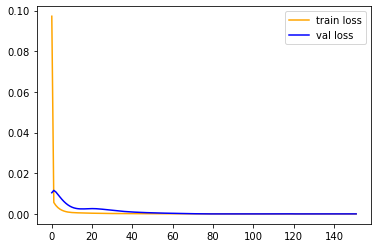

In [24]:
train_loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']
plt.plot(train_loss_1, label='train loss', c='orange')
plt.plot(val_loss_1, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

### 3.4 Evaluation

In [25]:
test_prediction_1 = []
test_actual = []
for x, y in dataset_test:
    test_actual.append(y[0][0])
    predict_res = model.predict(x)[0][0]
    test_prediction_1.append(predict_res)
test_prediction_1 = np.array(test_prediction_1)
test_actual = np.array(test_actual)

In [26]:
len(test_prediction_1)

9952

In [27]:
len(test_actual)

9952

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

rmse1 = mean_squared_error(test_actual, test_prediction_1, squared=False)
mape1 = mean_absolute_percentage_error(test_actual, test_prediction_1)
mae1 = mean_absolute_error(test_actual, test_prediction_1)

print('result evaluation')
print('RMSE: ', rmse1)
print('MAPE: ', mape1)
print('MAE:  ', mae1)


result evaluation
RMSE:  0.005665531255663817
MAPE:  0.007303904131530708
MAE:   0.0054925181498826515


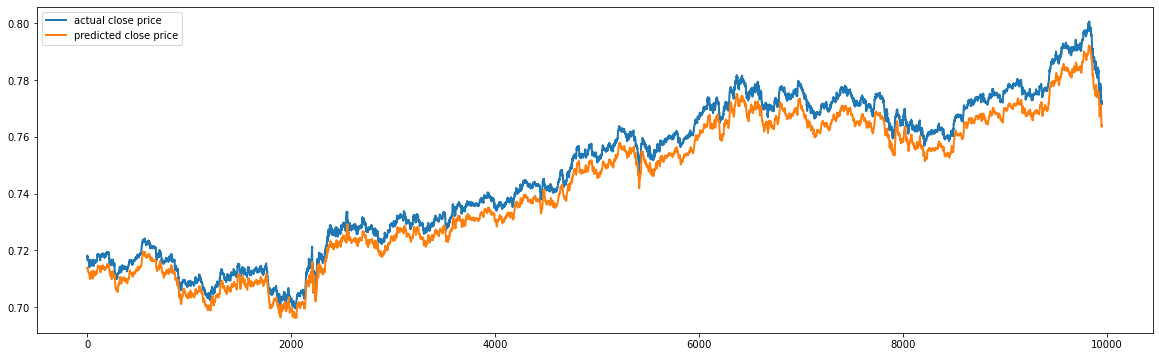

In [29]:
x_axis = [x for x in range(test_actual.shape[0])]
plt.figure(figsize=(20,6))

sns.lineplot(x=x_axis, y=test_actual, label='actual close price', linewidth=2)
sns.lineplot(x=x_axis, y=test_prediction_1, label='predicted close price', linewidth=2)
plt.legend()
plt.show()